In [1]:
import pandas as pd
df1 = pd.read_csv('RESULT.oa.csv')
df2 = pd.read_csv('RESULT.non oa.csv')
df = pd.concat([df1, df2], axis=0)  # axis=0表示垂直堆叠，axis=1表示水平堆叠
missing_counts = df.isna().sum()
non_missing_counts = df.count()

# 计算每列的缺失率
missing_rates = missing_counts / (non_missing_counts+missing_counts)

# 打印每列的缺失率
# 将缺失率转换为DataFrame
missing_rate_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Non-Missing Count': non_missing_counts,
    'Missing Rate': missing_rates
})

# 重新排列列的顺序
missing_rate_df = missing_rate_df[['Non-Missing Count', 'Missing Count', 'Missing Rate']]

# 打印缺失率DataFrame
print(missing_rate_df)
print(df1.shape,df2.shape)
missing_rate_df.head(200)

            Non-Missing Count  Missing Count  Missing Rate
label                     618              0           0.0
Gender                    618              0           0.0
Age                       618              0           0.0
BMI                       618              0           0.0
SBP                       618              0           0.0
...                       ...            ...           ...
Busyness                  618              0           0.0
Coarseness                618              0           0.0
Complexity                618              0           0.0
Contrast.1                618              0           0.0
Strength                  618              0           0.0

[131 rows x 3 columns]
(156, 131) (462, 131)


,Non-Missing Count,Missing Count,Missing Rate
label,618,0,0.0
Gender,618,0,0.0
Age,618,0,0.0
BMI,618,0,0.0
SBP,618,0,0.0
...,...,...,...
Busyness,618,0,0.0
Coarseness,618,0,0.0
Complexity,618,0,0.0
Contrast.1,618,0,0.0


In [2]:
df = pd.concat([df1, df2], axis=0)  # axis=0表示垂直堆叠，axis=1表示水平堆叠
print(df.shape)

(618, 131)


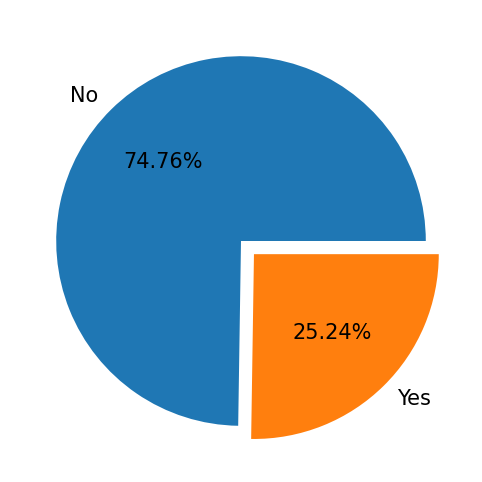

In [3]:
# 观察是否存在类别不平衡现象
# for index in config.data_field_names:
import matplotlib.pyplot as plt

df_data=df
p = df_data['label'].value_counts()    # 目标变量正负样本的分布

plt.figure(figsize=(10,6))    # 构建图像

# 绘制饼图并调整字体大小
patches, l_text, p_text = plt.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
# l_text是饼图对着文字大小，p_text是饼图内文字大小
for t in p_text:
    t.set_size(15)
for t in l_text:
    t.set_size(15)

plt.show()    # 展示图像


In [6]:
 # 数据采样
# 计算正负样本所取数量
import importlib
df_label = df_data
# df_label = df_data.fillna(0)
print("打印field:",df_label["label"].value_counts())
min_sample = min(df_label["label"].value_counts()[1], df_label["label"].value_counts()[0])
print("min_sample: " + str(min_sample))

max_sample = max(df_label["label"].value_counts()[1], df_label["label"].value_counts()[0])
print("max_sample: " + str(max_sample))

# df_label = df_label[config.data_field_names]

打印field: 0    462
1    156
Name: label, dtype: int64
min_sample: 156
max_sample: 462


In [7]:
 # min_sample = 200000 开始随机采样
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data_deliver_success = df_label[df_label["label"] ==0].sample(n=max_sample)
print("data_deliver_success: " + str(data_deliver_success.shape))
data_deliver_failed = df_label[df_label["label"] ==1].sample(n=min_sample)
print("data_deliver_failed: " + str(data_deliver_failed.shape))

data_deliver_success_train, data_deliver_success_test, _, _ = train_test_split(data_deliver_success,
                                                                                   data_deliver_success["label"],
                                                                                   test_size=0.2,
                                                                                   random_state=12343)
data_deliver_failed_train, data_deliver_failed_test, _, _ = train_test_split(data_deliver_failed,
                                                                                   data_deliver_failed["label"],
                                                                                   test_size=0.2,
                                                                                   random_state=12343)
data_deliver_success_train.head()
# 创建训练数据
train_data = shuffle(pd.concat([data_deliver_success_train, data_deliver_failed_train], axis=0))
train_data.reset_index(drop=True)
print("train_data shape is " + str(train_data.shape))

# 创建测试数据
test_data = shuffle(pd.concat([data_deliver_success_test, data_deliver_failed_test], axis=0))
test_data.reset_index(drop=True)
print("test_data shape is " + str(test_data.shape))
train_data.head(200)

data_deliver_success: (462, 131)
data_deliver_failed: (156, 131)
train_data shape is (493, 131)
test_data shape is (125, 131)


,label,Gender,Age,BMI,SBP,DBP,PT,INR,ALT,AST,...,SmallAreaHighGrayLevelEmphasis,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZonePercentage,ZoneVariance,Busyness,Coarseness,Complexity,Contrast.1,Strength
133,0,1,65,19.23,132,74,13.6,1.04,18,21,...,2.548874,0.251302,3.647120,0.024976,1.521381e+05,63.616914,0.002360,0.583998,0.009380,0.004651
191,0,0,56,22.06,115,71,12.9,1.10,10,13,...,4.251265,0.072597,4.254231,0.031412,7.716850e+04,30.551011,0.002381,2.073726,0.013694,0.009865
90,0,1,84,14.22,134,74,12.6,1.00,21,22,...,3.131448,0.085502,3.333848,0.013064,2.948383e+05,70.695333,0.002071,0.657473,0.008251,0.004728
74,1,0,83,28.13,145,66,13.8,1.14,12,21,...,5.556720,0.100672,4.052516,0.024207,9.812866e+04,36.475021,0.001420,4.535497,0.014958,0.010737
178,0,1,82,16.53,135,68,15.6,1.29,6,18,...,3.010716,0.314099,3.213149,0.014793,2.302138e+05,101.111528,0.001569,0.984569,0.014598,0.003749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,72,19.98,121,73,13.8,1.09,14,18,...,2.703369,0.269624,3.388381,0.009798,3.371632e+05,119.472818,0.001341,1.130036,0.016721,0.003449
337,0,1,57,28.96,140,94,11.5,0.90,33,18,...,4.625695,0.233333,2.921928,0.001921,1.073211e+06,103.902998,0.000889,3.043298,0.018648,0.005297
121,1,1,56,27.34,140,81,13.4,1.02,39,26,...,7.543838,0.167350,3.840234,0.023135,7.875023e+04,35.876182,0.001566,4.884970,0.021492,0.011213
314,0,1,58,17.63,123,65,13.2,1.05,16,15,...,6.769089,0.093669,3.431586,0.027089,8.750169e+04,44.284044,0.001169,4.821274,0.015884,0.010556


In [8]:
# 生成模型训练测试集
import sys
sys.path.append('..')
import importlib

# 填充缺失值
print(train_data.dtypes)
train_data_target = train_data["label"]
train_data = train_data.fillna(0)

test_data_target = test_data["label"]
test_data = test_data.fillna(0)

X_train = train_data
y_train = train_data_target
X_test = test_data
y_test = test_data_target
X_train = X_train.drop('label', axis=1)
X_test = X_test.drop('label', axis=1)
X_train.head()


label           int64
Gender          int64
Age             int64
BMI           float64
SBP             int64
               ...   
Busyness      float64
Coarseness    float64
Complexity    float64
Contrast.1    float64
Strength      float64
Length: 131, dtype: object


,Gender,Age,BMI,SBP,DBP,PT,INR,ALT,AST,GGT,...,SmallAreaHighGrayLevelEmphasis,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZonePercentage,ZoneVariance,Busyness,Coarseness,Complexity,Contrast.1,Strength
133,1,65,19.23,132,74,13.6,1.04,18,21,15,...,2.548874,0.251302,3.647120,0.024976,152138.11390,63.616914,0.002360,0.583998,0.009380,0.004651
191,0,56,22.06,115,71,12.9,1.10,10,13,35,...,4.251265,0.072597,4.254231,0.031412,77168.49780,30.551011,0.002381,2.073726,0.013694,0.009865
90,1,84,14.22,134,74,12.6,1.00,21,22,17,...,3.131448,0.085502,3.333848,0.013064,294838.27750,70.695333,0.002071,0.657473,0.008251,0.004728
74,0,83,28.13,145,66,13.8,1.14,12,21,59,...,5.556720,0.100672,4.052516,0.024207,98128.65816,36.475021,0.001420,4.535497,0.014958,0.010737
178,1,82,16.53,135,68,15.6,1.29,6,18,9,...,3.010716,0.314099,3.213149,0.014793,230213.77300,101.111528,0.001569,0.984569,0.014598,0.003749


In [10]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/294.9 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/294.9 kB 640.0 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 109.5 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/294.9 kB 140.3 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 140.3 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/294.9 kB 137.9 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 142.6 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/294.9 kB 183.3 kB/s eta 0:00:02
   ------------- ------------------------ 102.4/294.9 kB 203.4 kB/


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


(array([369.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 124.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

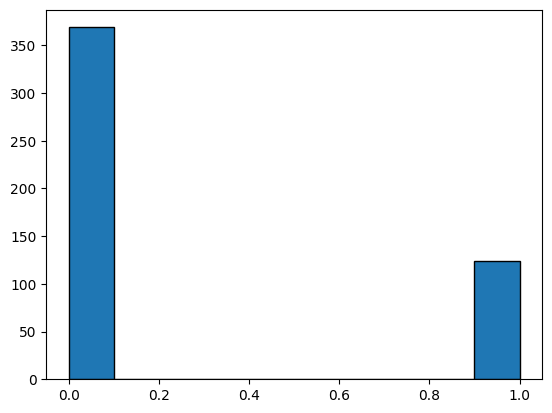

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# 查看训练数据样本是否平衡

train_labels = np.array(train_data_target.astype(np.int64)).reshape((-1,))
test_labels = np.array(test_data_target.astype(np.int64)).reshape((-1,))

features = np.array(X_train)
test_features = np.array(X_test)
labels = train_labels[:]

plt.hist(labels, edgecolor = 'k')

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# # 创建逻辑回归模型
# logreg = LogisticRegression()

# # 训练模型
# logreg.fit(X_train, y_train)

from sklearn.svm import SVC

# 创建支持向量机
# 假设你有X_train和y_train，分别是训练数据和标签
# svc = SVC(kernel='linear', C=1.0, random_state=42)  # 使用线性核，C参数为1.0，随机状态设为42
# svc.fit(X_train, y_train)  # 训练SVM模型
# print("开始训练svc")

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 创建 SVM 分类器实例
svc = SVC(kernel='linear')  # 使用线性核

# 训练模型
svc.fit(X_train, y_train)

# logreg = joblib.load(filename='logreg_model.pkl')


# 预测测试集
y_pred = svc.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"SVC准确率: {accuracy}")
print(f"conf_matrix是一个二维数组，表示混淆矩阵，它展示了模型预测结果与实际标签的对比:\n{conf_matrix}")
print(f"class_report是一个字符串，包含了分类报告，报告了每个类别的精确度（precision）、召回率（recall）、f1分数（f1-score）和准确率（accuracy）:\n{class_report}")


SVC准确率: 0.776
conf_matrix是一个二维数组，表示混淆矩阵，它展示了模型预测结果与实际标签的对比:
[[80 13]
 [15 17]]
class_report是一个字符串，包含了分类报告，报告了每个类别的精确度（precision）、召回率（recall）、f1分数（f1-score）和准确率（accuracy）:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        93
           1       0.57      0.53      0.55        32

    accuracy                           0.78       125
   macro avg       0.70      0.70      0.70       125
weighted avg       0.77      0.78      0.77       125



In [14]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 创建随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 预测测试集
y_pred = rf.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"随机森林准确率: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


随机森林准确率: 0.816
Confusion Matrix:
[[89  4]
 [19 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        93
           1       0.76      0.41      0.53        32

    accuracy                           0.82       125
   macro avg       0.79      0.68      0.71       125
weighted avg       0.81      0.82      0.79       125



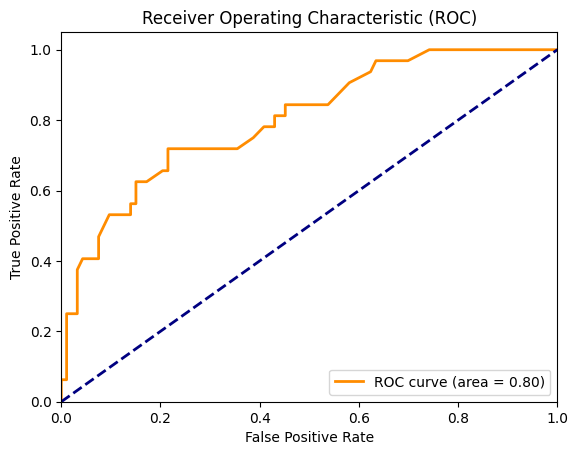

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 获取概率预测，这里我们关注正类（通常假设为1）
y_prob = rf.predict_proba(X_test)[:, 1]

# 计算ROC曲线和AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [57]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pandas import Series
import json
from sklearn.metrics import roc_auc_score


# 定义数据集
# train_data = lgb.Dataset(X_train, label=y_train)
# test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 设置参数
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # 或者 'multiclass'，根据你的问题类型选择
    'metric': 'binary_logloss',  # 对于二分类问题
    'metric': ['accuracy', 'auc'],  # 对于多分类问题，或者将'binary_logloss'替换为'multi_logloss'
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# 开始训练
gbm = lgb.train(params,
                train_data,
                num_boost_round=100,  #  Boosting轮数
                valid_sets=val_data,
                early_stopping_rounds=10)  # 早期停止轮数

# 在验证集上预测
y_pred_val = gbm.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred_val.round())
print(f'Accuracy: {accuracy:.4f}')

# 计算AUC
auc = roc_auc_score(y_test, y_pred_val)
print(f'AUC: {auc:.4f}')

# 获取特征重要度
feature_importance = gbm.feature_importance()
sorted_idx = feature_importance.argsort()

print(feature_importance)

# 预测测试集
# y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# 计算metrics
accuracy = accuracy_score(y_test, y_pred_val.round())
precision = precision_score(y_test, y_pred_val.round())
recall = recall_score(y_test, y_pred_val.round())
f1 = f1_score(y_test, y_pred_val.round())

# 打印metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
# 评估模型

accuracy = accuracy_score(y_test, y_pred_val.round())
conf_matrix = confusion_matrix(y_test, y_pred_val.round())
class_report = classification_report(y_test, y_pred_val.round())
print(f"gbm准确率: {accuracy}")
print(f"conf_matrix是一个二维数组，表示混淆矩阵，它展示了模型预测结果与实际标签的对比:\n{conf_matrix}")
print(f"class_report是一个字符串，包含了分类报告，报告了每个类别的精确度（precision）、召回率（recall）、f1分数（f1-score）和准确率（accuracy）:\n{class_report}")

print("开始输出模型特征排序")
features = Series(gbm.feature_importance(), index=gbm.feature_name())
features = features.sort_values(ascending=False)

# 加载json文件
# definition_file = "dataset_column_definition.json"
# with open(definition_file, "r") as f:
#     definitions = json.load(f)

for index in range(len(features)):
    feature_name, feature_value = features.index[index], features.iloc[index]
    print(feature_name, feature_value)

#     print(feature_name,definitions.get(feature_name), feature_value)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.796035
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.795195
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.783266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's auc: 0.794523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's auc: 0.807124
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's auc: 0.81754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7]	valid_0's auc: 0.820901
[LightGBM] [Warning] No further splits with positive g

/home/rd/.conda/envs/mingweichang_tensorflow/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


AUC Score: 0.9059


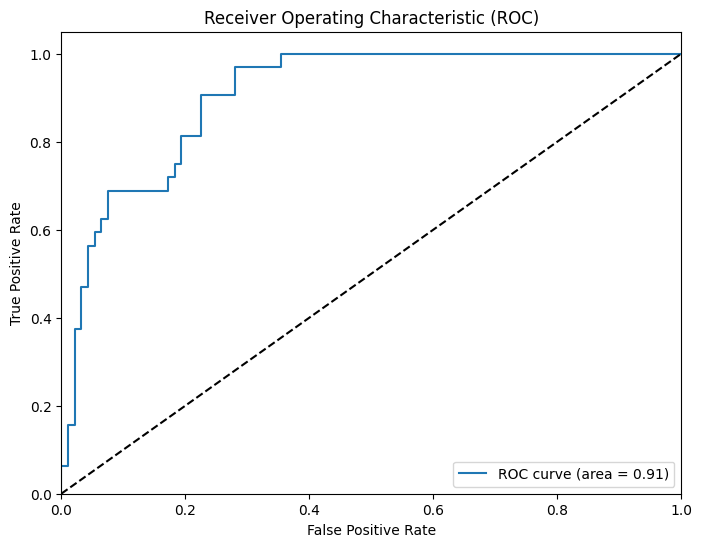

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# 计算ROC曲线的FPR和TPR
y_pred_proba = gbm.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score:.4f}')

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 画对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()